Logistic regression >> https://michael-fuchs-python.netlify.app/2019/11/15/multinomial-logistic-regression/

https://www.askpython.com/python/examples/fitting-a-logistic-regression-model

In [ ]:
from google.colab import files
uploaded = files.upload()#"standardizedallstats.csv"

Saving standardizedallstats.csv to standardizedallstats.csv


In [ ]:
from google.colab import files
uploaded = files.upload()#"mergedstats2022.csv"

Saving mergedstats2022.csv to mergedstats2022.csv


In [ ]:
from google.colab import files
uploaded = files.upload()#"standardizedtest2022.csv"

Saving standardizedtest2022.csv to standardizedtest2022.csv


In [ ]:
import pandas as pd
newdf = pd.read_csv("standardizedallstats.csv", encoding="latin-1", delimiter=",")
print(newdf.Year.unique())
newdf = newdf[newdf['Year'] >= 2012] #15 years
newdf = newdf.reset_index()


[1995. 1996. 1997. 1998. 2000. 2001. 2004. 2005. 2006. 2002. 2003. 1991.
 1992. 1993. 1994. 1999. 2017. 2010. 2011. 2012. 2013. 2014. 2015. 2008.
 2009. 2016. 2018. 2019. 2020. 2021. 2007.]


In [ ]:
import pandas as pd #stats used for creating a table at the end, NOT FOR PREDICTION
stats2022 = pd.read_csv("mergedstats2022.csv", encoding="latin-1", delimiter=",")

In [ ]:
import pandas as pd
test1 = pd.read_csv("standardizedtest2022.csv", encoding="latin-1", delimiter=",")
test1['TS%'] = test1['TS%'].fillna(0)
test1

,Unnamed: 0,Player,Age,GS,3PA,2PA,FTA,TRB,AST,STL,BLK,TOV,PF,PTS,W/L%,SRS,TS%
0,0,Aaron Gordon,26,2.118708,0.358892,1.099572,0.911635,1.019885,0.344497,-0.016339,0.613919,0.949343,0.499584,1.067394,0.615038,0.475308,0.530068
1,1,Austin Rivers,29,-0.090321,0.314814,-0.671842,-0.580524,-0.726428,-0.309885,0.465870,-0.718294,-0.261860,0.248860,-0.353762,0.615038,0.475308,0.102026
2,2,Bol Bol,22,-0.787910,-1.051614,-0.731890,-0.767044,-0.851164,-0.800670,-1.221864,-0.718294,-0.867461,-1.631575,-0.922225,0.615038,0.475308,0.352326
3,3,Bones Hyland,21,-0.632890,1.108224,-0.281531,0.103382,-0.310639,0.508092,-0.016339,-0.185409,0.222621,0.750309,0.293653,0.615038,0.475308,0.182811
4,4,Bryn Forbes,28,-0.710400,0.535206,-0.221483,-0.269657,-0.934322,-0.473480,-0.739654,-0.718294,-0.382980,-0.377952,0.088375,0.615038,0.475308,0.287251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,600,Micah Potter,23,-0.787910,-0.875301,-0.311554,-0.580524,-0.185902,-1.018798,-0.739654,-0.185409,-0.867461,-0.377952,-0.669575,-1.553654,-1.554367,-0.240436
601,601,Rodney McGruder,30,-0.710400,0.094422,-0.761914,-0.704871,-0.518533,-0.528012,-0.498549,-0.718294,-0.625221,-0.628677,-0.448506,-1.553654,-1.554367,0.400184
602,602,Saben Lee,22,-0.787910,-0.478596,-0.251507,0.165556,-0.435375,0.562624,0.948080,-0.185409,-0.019619,-0.503314,-0.416925,-1.553654,-1.554367,-0.256904
603,603,Saddiq Bey,22,2.389992,2.077947,0.709260,0.911635,0.811991,0.508092,0.706975,-0.451851,0.222621,-0.001865,1.241091,-1.553654,-1.554367,-0.027559


In [ ]:
player_list = newdf.Player
index_list = newdf.index
zip_player_index = zip(index_list, player_list)
dict_player_index = dict(zip_player_index)
#dict_player_index

{0: 'A.J. Hammons',
 1: 'Ben Bentil',
 2: 'DeAndre Liggins',
 3: 'Devin Harris',
 4: 'Dirk Nowitzki',
 5: 'Dorian Finney-Smith',
 6: 'Dwight Powell',
 7: 'Harrison Barnes',
 8: 'J.J. Barea',
 9: 'Jarrod Uthoff',
 10: 'Jonathan Gibson',
 11: 'Manny Harris',
 12: 'Nerlens Noel',
 13: 'NicolÃ\x83Â\x83Ã\x82Â¡s Brussino',
 14: 'Pierre Jackson',
 15: 'Salah Mejri',
 16: 'Seth Curry',
 17: 'Wesley Matthews',
 18: 'Yogi Ferrell',
 19: 'Aaron Brooks',
 20: 'Al Jefferson',
 21: 'C.J. Miles',
 22: 'Georges Niang',
 23: 'Glenn Robinson III',
 24: 'Jeff Teague',
 25: 'Joe Young',
 26: 'Kevin SÃ\x83Â\x83Ã\x82Â©raphin',
 27: 'Lance Stephenson',
 28: 'Lavoy Allen',
 29: 'Monta Ellis',
 30: 'Myles Turner',
 31: 'Paul George',
 32: 'Rakeem Christmas',
 33: 'Rodney Stuckey',
 34: 'Thaddeus Young',
 35: 'Aaron Gordon',
 36: 'Anthony Brown',
 37: 'Arinze Onuaku',
 38: 'Bismack Biyombo',
 39: 'C.J. Watson',
 40: 'C.J. Wilcox',
 41: 'D.J. Augustin',
 42: 'Damjan Rude?',
 43: 'Elfrid Payton',
 44: 'Evan Fourn

In [ ]:
year_list = newdf.Year
zip_year_index = zip(index_list, year_list)
dict_year_index = dict(zip_year_index)
dict_year_index

{0: 2017.0,
 1: 2017.0,
 2: 2017.0,
 3: 2017.0,
 4: 2017.0,
 5: 2017.0,
 6: 2017.0,
 7: 2017.0,
 8: 2017.0,
 9: 2017.0,
 10: 2017.0,
 11: 2017.0,
 12: 2017.0,
 13: 2017.0,
 14: 2017.0,
 15: 2017.0,
 16: 2017.0,
 17: 2017.0,
 18: 2017.0,
 19: 2017.0,
 20: 2017.0,
 21: 2017.0,
 22: 2017.0,
 23: 2017.0,
 24: 2017.0,
 25: 2017.0,
 26: 2017.0,
 27: 2017.0,
 28: 2017.0,
 29: 2017.0,
 30: 2017.0,
 31: 2017.0,
 32: 2017.0,
 33: 2017.0,
 34: 2017.0,
 35: 2017.0,
 36: 2017.0,
 37: 2017.0,
 38: 2017.0,
 39: 2017.0,
 40: 2017.0,
 41: 2017.0,
 42: 2017.0,
 43: 2017.0,
 44: 2017.0,
 45: 2017.0,
 46: 2017.0,
 47: 2017.0,
 48: 2017.0,
 49: 2017.0,
 50: 2017.0,
 51: 2017.0,
 52: 2017.0,
 53: 2017.0,
 54: 2017.0,
 55: 2017.0,
 56: 2017.0,
 57: 2017.0,
 58: 2017.0,
 59: 2017.0,
 60: 2017.0,
 61: 2017.0,
 62: 2017.0,
 63: 2017.0,
 64: 2017.0,
 65: 2017.0,
 66: 2017.0,
 67: 2017.0,
 68: 2017.0,
 69: 2017.0,
 70: 2017.0,
 71: 2017.0,
 72: 2017.0,
 73: 2017.0,
 74: 2017.0,
 75: 2017.0,
 76: 2017.0,
 77: 2017

In [ ]:
team_list = newdf.Tm
zip_team_index = zip(index_list, team_list)
dict_team_index = dict(zip_team_index)
dict_team_index

{0: 'DAL',
 1: 'DAL',
 2: 'DAL',
 3: 'DAL',
 4: 'DAL',
 5: 'DAL',
 6: 'DAL',
 7: 'DAL',
 8: 'DAL',
 9: 'DAL',
 10: 'DAL',
 11: 'DAL',
 12: 'DAL',
 13: 'DAL',
 14: 'DAL',
 15: 'DAL',
 16: 'DAL',
 17: 'DAL',
 18: 'DAL',
 19: 'IND',
 20: 'IND',
 21: 'IND',
 22: 'IND',
 23: 'IND',
 24: 'IND',
 25: 'IND',
 26: 'IND',
 27: 'IND',
 28: 'IND',
 29: 'IND',
 30: 'IND',
 31: 'IND',
 32: 'IND',
 33: 'IND',
 34: 'IND',
 35: 'ORL',
 36: 'ORL',
 37: 'ORL',
 38: 'ORL',
 39: 'ORL',
 40: 'ORL',
 41: 'ORL',
 42: 'ORL',
 43: 'ORL',
 44: 'ORL',
 45: 'ORL',
 46: 'ORL',
 47: 'ORL',
 48: 'ORL',
 49: 'ORL',
 50: 'ORL',
 51: 'ORL',
 52: 'ORL',
 53: 'CHO',
 54: 'CHO',
 55: 'CHO',
 56: 'CHO',
 57: 'CHO',
 58: 'CHO',
 59: 'CHO',
 60: 'CHO',
 61: 'CHO',
 62: 'CHO',
 63: 'CHO',
 64: 'CHO',
 65: 'CHO',
 66: 'CHO',
 67: 'CHO',
 68: 'CHO',
 69: 'CHO',
 70: 'MIN',
 71: 'MIN',
 72: 'MIN',
 73: 'MIN',
 74: 'MIN',
 75: 'MIN',
 76: 'MIN',
 77: 'MIN',
 78: 'MIN',
 79: 'MIN',
 80: 'MIN',
 81: 'MIN',
 82: 'MIN',
 83: 'MIN',
 8

In [ ]:
newdf = newdf.drop(["Unnamed: 0"], axis = 1)
newdf

,index,Unnamed: 0.1,Unnamed: 0.1.1,Player,Pos,Age,Tm,G,GS,MP,...,W,L,W/L%,GB,PS/G,PA/G,SRS,TS%,Rank,MVP
0,6829,0,-1.428326,A.J. Hammons,C,-0.554215,DAL,-1.279530,-0.881347,-1.379770,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.527129,0.0,0
1,6830,1,-1.428099,Ben Bentil,PF,-1.244852,DAL,-2.044464,-0.881347,-1.832327,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-5.835876,0.0,0
2,6831,2,-1.427872,DeAndre Liggins,SG,0.366635,DAL,0.330859,-0.219692,-0.816833,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.433768,0.0,0
3,6832,3,-1.427645,Devin Harris,PG,1.517696,DAL,0.451638,-0.881347,-0.353238,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,0.269501,0.0,0
4,6833,4,-1.427418,Dirk Nowitzki,PF,2.668758,DAL,0.008781,0.999146,0.717446,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.018536,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5013,13629,535,1.594423,Patty Mills,PG,1.568638,SAS,1.222186,-0.819807,0.534912,...,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,0.234289,0.0,0
5014,13630,536,1.594665,Quinndary Weatherspoon,SG,-0.378637,SAS,-1.095907,-0.862955,-1.474066,...,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.105987,0.0,0
5015,13631,537,1.594907,Rudy Gay,PF,2.055457,SAS,0.980718,-0.819807,0.191129,...,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.124223,0.0,0
5016,13632,538,1.595149,Tre Jones,PG,-1.108865,SAS,-0.274916,-0.819807,-1.345147,...,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.063138,0.0,0


In [ ]:
#newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5018 entries, 0 to 5017
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           5018 non-null   int64  
 1   Unnamed: 0.1    5018 non-null   int64  
 2   Unnamed: 0.1.1  5018 non-null   float64
 3   Player          5018 non-null   object 
 4   Pos             5018 non-null   object 
 5   Age             5018 non-null   float64
 6   Tm              5018 non-null   object 
 7   G               5018 non-null   float64
 8   GS              5018 non-null   float64
 9   MP              5018 non-null   float64
 10  FG              5018 non-null   float64
 11  FGA             5018 non-null   float64
 12  FG%             5018 non-null   float64
 13  3P              5018 non-null   float64
 14  3PA             5018 non-null   float64
 15  3P%             5018 non-null   float64
 16  2P              5018 non-null   float64
 17  2PA             5018 non-null   f

In [ ]:
newdf.columns

Index(['index', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Player', 'Pos', 'Age', 'Tm',
       'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Pts Won', 'Pts Max', 'Share',
       'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'TS%', 'Rank',
       'MVP'],
      dtype='object')

In [ ]:
categorical = [val for val in newdf.columns[newdf.dtypes == "O"]]
categorical

['Player', 'Pos', 'Tm', 'Team']

# remove player column value on player too because it doesn't play the role.

In [ ]:
newdf = newdf.drop(["Player"], axis =1 )
newdf

,index,Unnamed: 0.1,Unnamed: 0.1.1,Pos,Age,Tm,G,GS,MP,FG,...,W,L,W/L%,GB,PS/G,PA/G,SRS,TS%,Rank,MVP
0,6829,0,-1.428326,C,-0.554215,DAL,-1.279530,-0.881347,-1.379770,-1.074999,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.527129,0.0,0
1,6830,1,-1.428099,PF,-1.244852,DAL,-2.044464,-0.881347,-1.832327,-1.445663,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-5.835876,0.0,0
2,6831,2,-1.427872,SG,0.366635,DAL,0.330859,-0.219692,-0.816833,-1.028667,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.433768,0.0,0
3,6832,3,-1.427645,PG,1.517696,DAL,0.451638,-0.881347,-0.353238,-0.472672,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,0.269501,0.0,0
4,6833,4,-1.427418,PF,2.668758,DAL,0.008781,0.999146,0.717446,1.102647,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.018536,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5013,13629,535,1.594423,PG,1.568638,SAS,1.222186,-0.819807,0.534912,0.175692,...,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,0.234289,0.0,0
5014,13630,536,1.594665,SG,-0.378637,SAS,-1.095907,-0.862955,-1.474066,-1.060862,...,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.105987,0.0,0
5015,13631,537,1.594907,PF,2.055457,SAS,0.980718,-0.819807,0.191129,0.388891,...,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.124223,0.0,0
5016,13632,538,1.595149,PG,-1.108865,SAS,-0.274916,-0.819807,-1.345147,-0.975582,...,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.063138,0.0,0


In [ ]:
indexTest_list = test1.index
player_list = test1.Player
zip_player_index22 = zip(indexTest_list, player_list)
dict_player_index22 = dict(zip_player_index22)
dict_player_index22

{0: 'Aaron Gordon',
 1: 'Austin Rivers',
 2: 'Bol Bol',
 3: 'Bones Hyland',
 4: 'Bryn Forbes',
 5: 'Carlik Jones',
 6: 'Davon Reed',
 7: 'DeMarcus Cousins',
 8: 'Facundo Campazzo',
 9: 'JaMychal Green',
 10: 'James Ennis III',
 11: 'Jeff Green',
 12: 'Markus Howard',
 13: 'Michael Porter Jr.',
 14: 'Monte Morris',
 15: 'Nikola Jokic',
 16: 'PJ Dozier',
 17: 'Petr Cornelie',
 18: 'Vlatko Cancar',
 19: 'Will Barton',
 20: 'Zeke Nnaji',
 21: 'Aaron Henry',
 22: 'Charles Bassey',
 23: 'Charlie Brown Jr.',
 24: 'Danny Green',
 25: 'DeAndre Jordan',
 26: 'Furkan Korkmaz',
 27: 'Georges Niang',
 28: 'Isaiah Joe',
 29: 'Jaden Springer',
 30: 'James Harden',
 31: 'Joel Embiid',
 32: 'Matisse Thybulle',
 33: 'Myles Powell',
 34: 'Paul Millsap',
 35: 'Paul Reed',
 36: 'Shake Milton',
 37: 'Tobias Harris',
 38: 'Tyrese Maxey',
 39: 'Willie Cauley-Stein',
 40: 'Aaron Holiday',
 41: 'Abdel Nader',
 42: 'Bismack Biyombo',
 43: 'Cameron Johnson',
 44: 'Cameron Payne',
 45: 'Chandler Hutchison',
 46: '

In [ ]:
newdf.Pos.unique()

array(['C', 'PF', 'SG', 'PG', 'SF', 'PF-C', 'SF-PF', 'C-PF', 'PF-SF',
       'SG-SF', 'SG-PG', 'PG-SG', 'SF-SG', 'SG-PF', 'SF-C'], dtype=object)

# Shift column MVP to the first column

In [ ]:
first_column = newdf.pop('MVP')
  
# insert column using insert(position,column_name,
# first_column) function
newdf.insert(0, 'MVP', first_column)
df = newdf.rename(columns={'TS_percent':'TS%'})

df

,MVP,index,Unnamed: 0.1,Unnamed: 0.1.1,Pos,Age,Tm,G,GS,MP,...,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,TS%,Rank
0,0,6829,0,-1.428326,C,-0.554215,DAL,-1.279530,-0.881347,-1.379770,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.527129,0.0
1,0,6830,1,-1.428099,PF,-1.244852,DAL,-2.044464,-0.881347,-1.832327,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-5.835876,0.0
2,0,6831,2,-1.427872,SG,0.366635,DAL,0.330859,-0.219692,-0.816833,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.433768,0.0
3,0,6832,3,-1.427645,PG,1.517696,DAL,0.451638,-0.881347,-0.353238,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,0.269501,0.0
4,0,6833,4,-1.427418,PF,2.668758,DAL,0.008781,0.999146,0.717446,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.018536,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5013,0,13629,535,1.594423,PG,1.568638,SAS,1.222186,-0.819807,0.534912,...,San Antonio Spurs,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,0.234289,0.0
5014,0,13630,536,1.594665,SG,-0.378637,SAS,-1.095907,-0.862955,-1.474066,...,San Antonio Spurs,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.105987,0.0
5015,0,13631,537,1.594907,PF,2.055457,SAS,0.980718,-0.819807,0.191129,...,San Antonio Spurs,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.124223,0.0
5016,0,13632,538,1.595149,PG,-1.108865,SAS,-0.274916,-0.819807,-1.345147,...,San Antonio Spurs,-0.265344,0.265344,-0.268188,-0.216378,-0.212679,0.180358,-0.289204,-0.063138,0.0


Remove dependent variables  >> pts won, pts max,share and rank

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5018 entries, 0 to 5017
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MVP             5018 non-null   int64  
 1   index           5018 non-null   int64  
 2   Unnamed: 0.1    5018 non-null   int64  
 3   Unnamed: 0.1.1  5018 non-null   float64
 4   Pos             5018 non-null   object 
 5   Age             5018 non-null   float64
 6   Tm              5018 non-null   object 
 7   G               5018 non-null   float64
 8   GS              5018 non-null   float64
 9   MP              5018 non-null   float64
 10  FG              5018 non-null   float64
 11  FGA             5018 non-null   float64
 12  FG%             5018 non-null   float64
 13  3P              5018 non-null   float64
 14  3PA             5018 non-null   float64
 15  3P%             5018 non-null   float64
 16  2P              5018 non-null   float64
 17  2PA             5018 non-null   f

we want to only look at these features

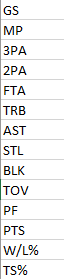

# Waiting for some more features to be removed.

In [ ]:
#split train/test
#X = df.drop(["G","MP","FG","FGA","FG%","eFG%","3P","3P%","2P","2P%","FT","FT%","ORB","DRB","Year","MVP","Pts Won","Tm","Pos","Pts Max","Share","W","L","GB","Rank","PS/G","PA/G"], axis = 1)
y = df.MVP
X = df[["Age", "GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"]]
X.dtypes

Age     float64
GS      float64
3PA     float64
2PA     float64
FTA     float64
TRB     float64
AST     float64
STL     float64
BLK     float64
TOV     float64
PF      float64
PTS     float64
W/L%    float64
SRS     float64
TS%     float64
dtype: object

In [ ]:
indexTest_list = test1.index
player_list = test1.Player
zip_player_index22 = zip(indexTest_list, player_list)
dict_player_index22 = dict(zip_player_index22)
dict_player_index22
player22list = list(dict_player_index22.values())

# feature importance >> https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

model.feature_importances_
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(kind='barh')
#plt.show()

array([0.03905521, 0.05108419, 0.04907753, 0.07630677, 0.12215823,
       0.04654875, 0.07954388, 0.05333873, 0.03874838, 0.06390378,
       0.0412537 , 0.14422173, 0.07273646, 0.06953635, 0.05248631])

In [ ]:
list(X.columns)
classvalsdf = pd.DataFrame(columns = ["Age", "GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"])
classvalsdf

,Age,GS,3PA,2PA,FTA,TRB,AST,STL,BLK,TOV,PF,PTS,W/L%,SRS,TS%


#Number of times to run loop

In [ ]:
n=500

#Get column names of top 10 most important variables
Run loop 100 times to get average

---



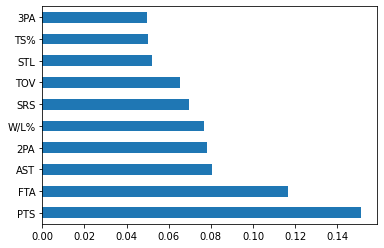

Age     0.039856
GS      0.049569
3PA     0.049670
2PA     0.078124
FTA     0.116430
TRB     0.045532
AST     0.080730
STL     0.052028
BLK     0.037649
TOV     0.065320
PF      0.036993
PTS     0.151368
W/L%    0.076868
SRS     0.069749
TS%     0.050115
dtype: float64


,PTS,FTA,AST,2PA,W/L%,SRS,TOV,STL,TS%,3PA


In [ ]:
classvalsdf = pd.DataFrame(columns = ["Age", "GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"])

for x in range(0, n):
  from sklearn.ensemble import ExtraTreesClassifier
  import matplotlib.pyplot as plt
  X = df[["Age", "GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"]]
  model = ExtraTreesClassifier()
  model.fit(X,y)

  classvalsdf.loc[x] =  model.feature_importances_.tolist()

feat_importances = classvalsdf.mean(axis=0)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(classvalsdf.mean(axis=0))

col_name = pd.DataFrame(columns = classvalsdf.mean(axis=0).sort_values(ascending=False).head(10).keys()) #ugliest code I've written in my LIFE 3:25am
col_name

# Run a For Loop

In [ ]:
acc = 0
inacc= 0
right0 = 0
right1 = 0
right2 = 0
wrong0 = 0
wrong1 = 0
wrong2 = 0
accuracy = 0

X = X[list(col_name)]

test2022 = test1[list(col_name)]

avg_df0 = pd.DataFrame(columns = [col_name])
avg_df1 = pd.DataFrame(columns = [col_name])
avg_df2 = pd.DataFrame(columns = [col_name])

prob22df_1 = pd.DataFrame(columns = [list(range(0,605))])
prob22df_2 = pd.DataFrame(columns = [list(range(0,605))])
                      
for x in range(0, n):
  avg_list0 = []
  avg_list1 = []
  avg_list2 = []

  trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2)

  log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100000) #fit the model
  log_reg.fit(trainX, trainY)
  y_pred = log_reg.predict(testX)

  set(y_pred)

  from sklearn.metrics import accuracy_score
  acc += accuracy_score(testY, y_pred)
  inacc += 1-acc

  testX['Actual_MVP'] = testY
  testX['Predicted_MVP'] = y_pred #predY is the column formed by the model we trained. testY is the true label whether the particular play is MVP, non MVP, or MVP candidate.
  testX

  Player = []
  Year = []
  Team = []
  for row in testX.index:
    Player.append(dict_player_index[row])
    Year.append(dict_year_index[row])
    Team.append(dict_team_index[row])

  testX["Player"] = Player
  testX["Team"] = Team
  testX["Year"] = Year

  import numpy as np
  misclassified = testX.iloc[np.where(testX.Actual_MVP != testX.Predicted_MVP)]
  len(misclassified)
  accurated_classified = testX.iloc[np.where(testX.Actual_MVP == testX.Predicted_MVP)]

  misclassified_0 = misclassified.iloc[np.where(misclassified.Actual_MVP == 0)]
  misclassified_1 = misclassified.iloc[np.where(misclassified.Actual_MVP == 1)]
  misclassified_2 = misclassified.iloc[np.where(misclassified.Actual_MVP == 2)]
  accurated_classified_0 = accurated_classified.iloc[np.where(accurated_classified.Actual_MVP == 0)]
  accurated_classified_1 = accurated_classified.iloc[np.where(accurated_classified.Actual_MVP == 1)]
  accurated_classified_2 = accurated_classified.iloc[np.where(accurated_classified.Actual_MVP == 2)]

  wrong0 += len(misclassified_0)
  wrong1 += len(misclassified_1)
  wrong2 += len(misclassified_2)
  right0 += len(accurated_classified_0)
  right1 += len(accurated_classified_1)
  right2 += len(accurated_classified_2)


  for i in accurated_classified_0.columns[0:10]:
    avg_list0.append(accurated_classified_0[i].mean()) #create a list 
    avg_list1.append(accurated_classified_1[i].mean())
    avg_list2.append(accurated_classified_2[i].mean())
  
  avg_df0.loc[x] = avg_list0
  avg_df1.loc[x] = avg_list1
  avg_df2.loc[x] = avg_list2 #will eventually take a sum of each column then divide by number of row

  prob_test22 = log_reg.predict_proba(test2022)
  prob22_class1 = []
  prob22_class2 = []
  for j in range(len(prob_test22)):
    prob22_class1.append(prob_test22[j][1])
    prob22_class2.append(prob_test22[j][2])

  prob22df_1.loc[x] = prob22_class1
  prob22df_2.loc[x] = prob22_class2

  print(avg_list0)
  print(prob22df_1)


Streaming output truncated to the last 5000 lines.
425  9.479727e-14  3.965192e-10  6.701980e-09  6.814453e-10  9.544374e-10   

     ...           595           596           597           598  \
0    ...  5.418266e-17  3.892888e-13  8.617551e-14  5.198284e-15   
1    ...  6.283300e-16  1.848002e-12  4.777794e-13  3.225947e-14   
2    ...  8.416912e-17  7.560796e-13  1.933804e-13  7.962572e-15   
3    ...  1.033717e-16  5.677268e-13  1.515675e-13  7.445676e-15   
4    ...  1.015696e-15  2.695829e-12  9.463386e-13  4.599073e-14   
..   ...           ...           ...           ...           ...   
421  ...  1.773045e-16  7.237968e-13  1.800754e-13  1.244765e-14   
422  ...  4.636314e-16  2.385558e-12  8.662506e-13  3.022886e-14   
423  ...  7.250893e-17  6.082182e-13  1.623168e-13  6.155844e-15   
424  ...  2.339571e-16  1.375564e-12  4.018793e-13  1.476652e-14   
425  ...  5.797428e-16  1.814094e-12  6.622023e-13  3.331292e-14   

              599           600           601         

In [ ]:
stats2022 = stats2022[list(col_name)]

#print(type(prob22df_1.mean(axis=0)))
#print(prob22df_1.mean(axis=0))
#stats2022["MVP Probability"] = prob22df_1.mean(axis=0)

#playindex = pd.Series((i[0] for i in (range(0,605))))



In [ ]:
prob22MVP = pd.DataFrame(columns = ["MVP%", "Candidate%","Player"])
prob22Cand = pd.DataFrame(columns = [player22list])

prob22MVP["MVP%"] = prob22df_1.mean(axis=0)
prob22MVP["Candidate%"] = prob22df_2.mean(axis=0) + prob22df_1.mean(axis=0)
prob22MVP['Player'] = test1['Player'].values
print(prob22MVP)

stats2022['Index'] = (list(range(0,605)))

prob22MVP.reset_index()
print(prob22MVP)

stats2022
result = stats2022.join(prob22MVP, on=['Index'], how='inner').drop(["Index"], axis =1 )
result

             MVP%    Candidate%           Player
0    3.896233e-07  6.098520e-03     Aaron Gordon
1    9.472162e-11  8.448034e-05    Austin Rivers
2    1.390057e-11  3.340892e-05          Bol Bol
3    2.173464e-09  4.601127e-04     Bones Hyland
4    3.737259e-10  1.813580e-04      Bryn Forbes
..            ...           ...              ...
600  4.978247e-15  8.209588e-07     Micah Potter
601  2.629815e-14  1.784413e-06  Rodney McGruder
602  2.187162e-13  6.064692e-06        Saben Lee
603  3.949235e-11  7.316988e-05       Saddiq Bey
604  2.043878e-19  7.057191e-09   Trayvon Palmer

[605 rows x 3 columns]
             MVP%    Candidate%           Player
0    3.896233e-07  6.098520e-03     Aaron Gordon
1    9.472162e-11  8.448034e-05    Austin Rivers
2    1.390057e-11  3.340892e-05          Bol Bol
3    2.173464e-09  4.601127e-04     Bones Hyland
4    3.737259e-10  1.813580e-04      Bryn Forbes
..            ...           ...              ...
600  4.978247e-15  8.209588e-07     Micah Pot

,PTS,FTA,AST,2PA,W/L%,SRS,TOV,STL,TS%,3PA,MVP%,Candidate%,Player
0,15.0,3.1,2.5,7.7,0.585,2.16,1.8,0.6,0.601733,3.5,3.896233e-07,6.098520e-03,Aaron Gordon
1,6.0,0.7,1.3,1.8,0.585,2.16,0.8,0.8,0.544662,3.4,9.472162e-11,8.448034e-05,Austin Rivers
2,2.4,0.4,0.4,1.6,0.585,2.16,0.3,0.1,0.578035,0.3,1.390057e-11,3.340892e-05,Bol Bol
3,10.1,1.8,2.8,3.1,0.585,2.16,1.2,0.6,0.555433,5.2,2.173464e-09,4.601127e-04,Bones Hyland
4,8.8,1.2,1.0,3.3,0.585,2.16,0.7,0.3,0.569358,3.9,3.737259e-10,1.813580e-04,Bryn Forbes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,4.0,0.7,0.0,3.0,0.280,-7.36,0.3,0.3,0.499002,0.7,4.978247e-15,8.209588e-07,Micah Potter
601,5.4,0.5,0.9,1.5,0.280,-7.36,0.5,0.4,0.584416,2.9,2.629815e-14,1.784413e-06,Rodney McGruder
602,5.6,1.9,2.9,3.2,0.280,-7.36,1.0,1.0,0.496806,1.6,2.187162e-13,6.064692e-06,Saben Lee
603,16.1,3.1,2.8,6.4,0.280,-7.36,1.2,0.9,0.527385,7.4,3.949235e-11,7.316988e-05,Saddiq Bey


In [ ]:
result.sort_values(by='MVP%', ascending=False).head(20)

,PTS,FTA,AST,2PA,W/L%,SRS,TOV,STL,TS%,3PA,MVP%,Candidate%,Player
541,27.4,7.3,6.7,16.2,0.683,5.37,3.4,1.2,0.575340,4.5,0.159113,0.952795,Ja Morant
477,29.9,11.4,5.8,15.0,0.622,3.22,3.3,1.1,0.633045,3.6,0.137609,0.983687,Giannis Antetokounmpo
31,30.6,11.8,4.2,15.9,0.622,2.57,3.1,1.1,0.617135,3.7,0.104136,0.971369,Joel Embiid
48,26.8,5.3,4.8,13.9,0.780,6.94,2.4,1.1,0.576791,7.0,0.074812,0.880443,Devin Booker
15,27.1,6.3,7.9,13.8,0.585,2.16,3.8,1.5,0.661880,3.9,0.071006,0.940051,Nikola Jokic
463,28.4,7.5,8.7,12.8,0.634,3.12,4.5,1.2,0.570281,8.8,0.059957,0.860414,Luka Doncic
272,29.9,7.4,6.4,14.8,0.537,0.82,3.5,0.9,0.634658,5.5,0.025584,0.860885,Kevin Durant
196,27.9,7.8,4.9,18.3,0.561,-0.38,2.4,0.9,0.590301,1.9,0.025120,0.834423,DeMar DeRozan
46,14.7,3.1,10.8,8.3,0.780,6.94,2.4,1.9,0.580385,3.1,0.021353,0.773405,Chris Paul
511,28.4,7.3,9.7,12.3,0.524,1.55,4.0,0.9,0.603947,8.0,0.020275,0.823894,Trae Young


In [ ]:
result.sort_values(by='Candidate%', ascending=False).head(20)

,PTS,FTA,AST,2PA,W/L%,SRS,TOV,STL,TS%,3PA,MVP%,Candidate%,Player
477,29.9,11.4,5.8,15.0,0.622,3.22,3.3,1.1,0.633045,3.6,0.137609,0.983687,Giannis Antetokounmpo
31,30.6,11.8,4.2,15.9,0.622,2.57,3.1,1.1,0.617135,3.7,0.104136,0.971369,Joel Embiid
541,27.4,7.3,6.7,16.2,0.683,5.37,3.4,1.2,0.575340,4.5,0.159113,0.952795,Ja Morant
15,27.1,6.3,7.9,13.8,0.585,2.16,3.8,1.5,0.661880,3.9,0.071006,0.940051,Nikola Jokic
48,26.8,5.3,4.8,13.9,0.780,6.94,2.4,1.1,0.576791,7.0,0.074812,0.880443,Devin Booker
272,29.9,7.4,6.4,14.8,0.537,0.82,3.5,0.9,0.634658,5.5,0.025584,0.860885,Kevin Durant
463,28.4,7.5,8.7,12.8,0.634,3.12,4.5,1.2,0.570281,8.8,0.059957,0.860414,Luka Doncic
196,27.9,7.8,4.9,18.3,0.561,-0.38,2.4,0.9,0.590301,1.9,0.025120,0.834423,DeMar DeRozan
511,28.4,7.3,9.7,12.3,0.524,1.55,4.0,0.9,0.603947,8.0,0.020275,0.823894,Trae Young
46,14.7,3.1,10.8,8.3,0.780,6.94,2.4,1.9,0.580385,3.1,0.021353,0.773405,Chris Paul


In [ ]:
bumtotal = right0 + wrong0
mvptotal = right1 + wrong1
candtotal = right1 + right2 + wrong1 + wrong2

candright = right1 + right2

print(right0)
print(bumtotal)

print(right1)
print(mvptotal)

print(candright)
print(candtotal)

486061
488586
158
984
7317
13414


In [ ]:
print(acc)
print(avg_df0)
print(avg_df1)
print(avg_df2)

491.41235059760953
          PTS       FTA       AST       2PA      W/L%       SRS       TOV  \
0   -0.074408 -0.073614 -0.061006 -0.072029 -0.041805 -0.035923 -0.075545   
1   -0.081329 -0.055158 -0.077293 -0.056399 -0.036066 -0.023805 -0.060262   
2   -0.140601 -0.130403 -0.087560 -0.114237 -0.020248 -0.026189 -0.101559   
3   -0.081124 -0.090212 -0.073389 -0.088200 -0.055112 -0.058960 -0.085986   
4   -0.078603 -0.068984 -0.026676 -0.061059 -0.004788 -0.009074 -0.067372   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.116984 -0.133134 -0.091737 -0.091991 -0.049736 -0.048395 -0.099761   
496 -0.083068 -0.070058 -0.048335 -0.076517 -0.035110 -0.028531 -0.063205   
497 -0.085883 -0.108944 -0.091346 -0.071051 -0.041734 -0.030059 -0.105258   
498 -0.044806 -0.063490 -0.049693 -0.021109 -0.046651 -0.049557 -0.043008   
499 -0.087938 -0.095072 -0.067531 -0.087177 -0.027775 -0.026027 -0.076766   

          STL       TS%       3PA  
0   -0.051177  0.039

In [ ]:
type(log_reg)

print(log_reg.coef_)
print()
print(log_reg.intercept_)


#pred2022 = log_reg.predict(test2022)

[[-2.03913687 -0.17756502 -0.728292   -0.40189486 -1.25283211 -0.60872416
   0.19635763 -0.25689085 -1.04564111  0.48297365]
 [ 1.328388    0.18552139  0.6916183   0.92017031  1.29300253  0.63931918
  -0.04280764  0.30424276  1.33345554 -0.17800842]
 [ 0.71074887 -0.00795638  0.0366737  -0.51827546 -0.04017043 -0.03059502
  -0.15354999 -0.04735191 -0.28781443 -0.30496522]]

[ 10.95641246 -12.92780781   1.97139535]


#Create a plot
need divide the values in avg_list by n(number of times we run regression)

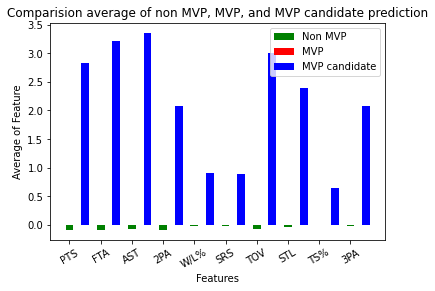

In [ ]:
import matplotlib.pyplot as plt
N = 10
ind = np.arange(N) 
width = 0.25
  
bar1 = plt.bar(ind, avg_list0 , width, color = 'g')
  
bar2 = plt.bar(ind+width, avg_list1, width, color='r')
  
bar3 = plt.bar(ind+width*2, avg_list2, width, color = 'b')
  
plt.xlabel("Features")
plt.ylabel('Average of Feature')
plt.title("Comparision average of non MVP, MVP, and MVP candidate prediction")
  
plt.xticks(np.arange(10),accurated_classified.columns[0:10], rotation = 30)
plt.legend( (bar1, bar2, bar3), ('Non MVP', 'MVP', 'MVP candidate') )
plt.show()

# This model which trained from year 1991 to 2021 matches with 1 player on their top 10 MVP prediction.

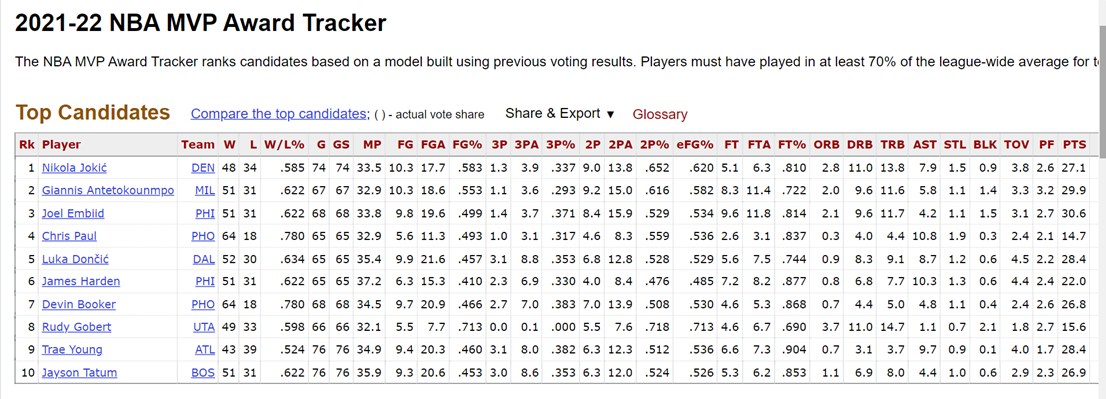